In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'D:\Project\final.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
994,57,1,3,128,229,0,2,150,0,0.4,2,1
995,61,1,4,120,260,0,0,140,1,3.6,2,1
996,39,1,4,118,219,0,0,140,0,1.2,2,1
997,61,0,4,145,307,0,2,146,1,1.0,2,1
998,56,1,4,125,249,1,2,144,1,1.2,2,1


In [5]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
target      0
dtype: int64


In [6]:
df.target.value_counts()

1    541
0    458
Name: target, dtype: int64

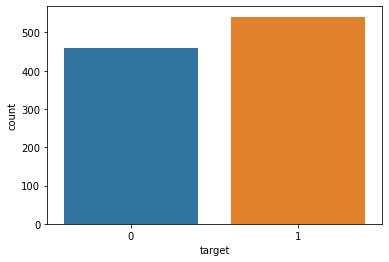

In [7]:
sns.countplot(x="target", data=df)
plt.show()


In [8]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Have No Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Having Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Have No Heart Disease: 45.85%
Percentage of Patients Having Heart Disease: 54.15%


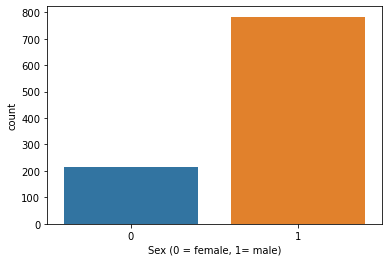

In [9]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [10]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 21.62%
Percentage of Male Patients: 78.38%


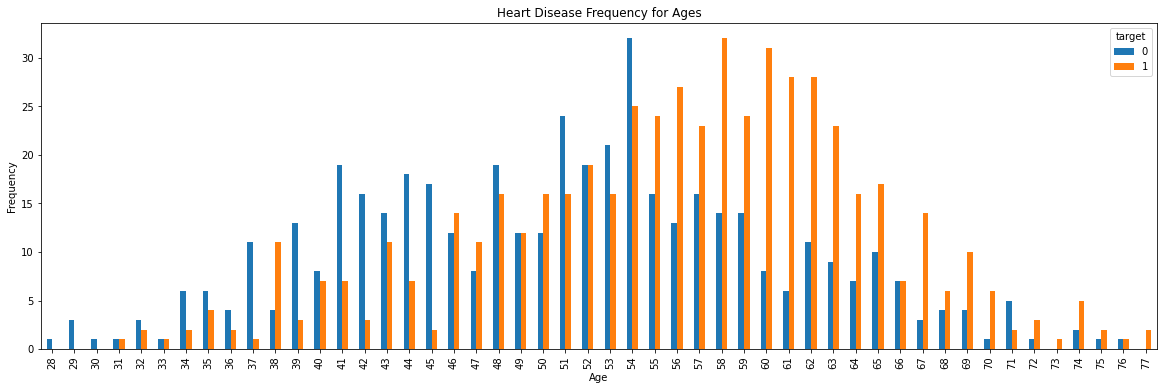

In [11]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

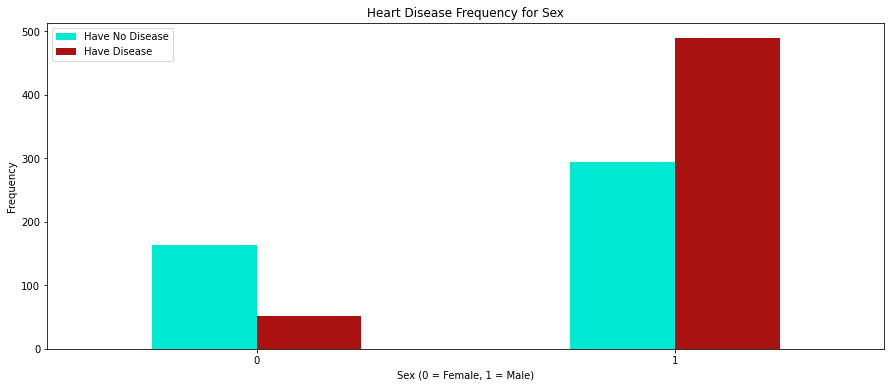

In [12]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#00ead3','#AA1111'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Have No Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()


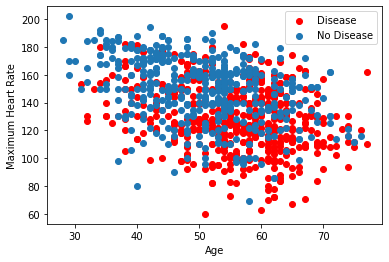

In [13]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

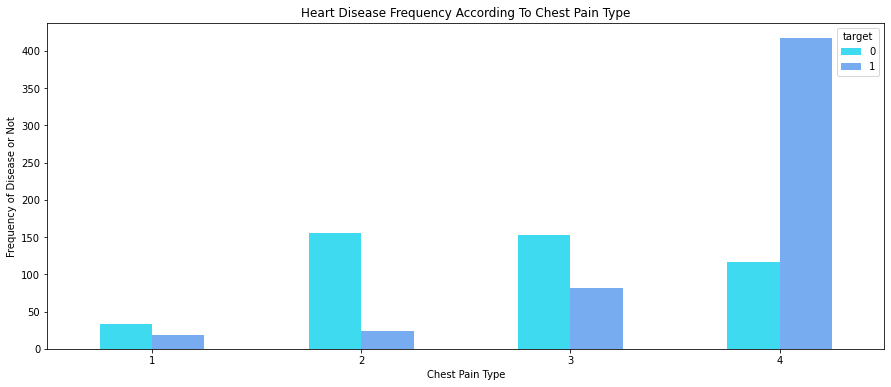

In [14]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#3edbf0','#77acf1'])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [15]:
a = pd.get_dummies(df['sex'], prefix = "sex")
b = pd.get_dummies(df['cp'], prefix = "cp")
c = pd.get_dummies(df['fbs'], prefix = "fbs")
d = pd.get_dummies(df['restecg'], prefix = "restecg")
e = pd.get_dummies(df['slope'], prefix = "slope")
f = pd.get_dummies(df['exang'], prefix = "exang")

In [16]:
frames = [df, a, b, c, d, e, f]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,fbs_1,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,slope_3,exang_0,exang_1
0,40,1,2,140,289,0,0,172,0,0.0,...,0,1,0,0,0,1,0,0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,...,0,1,0,0,0,0,1,0,1,0
2,37,1,2,130,283,0,1,98,0,0.0,...,0,0,1,0,0,1,0,0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,...,0,1,0,0,0,0,1,0,0,1
4,54,1,3,150,195,0,0,122,0,0.0,...,0,1,0,0,0,1,0,0,1,0


In [17]:
y = df['target']
x = df.drop(['target'], axis = 1)

In [18]:
df = df.drop(columns = ['cp', 'sex', 'slope', 'fbs', 'restecg', 'exang'])
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_1,cp_2,...,fbs_1,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,slope_3,exang_0,exang_1
0,40,140,289,172,0.0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,49,160,180,156,1.0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,37,130,283,98,0.0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
3,48,138,214,108,1.5,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4,54,150,195,122,0.0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [19]:
y

0      0
1      1
2      0
3      1
4      0
      ..
994    1
995    1
996    1
997    1
998    1
Name: target, Length: 999, dtype: int64

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=1)

In [21]:
accuracies = {}

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(x_train, y_train)
print("Random Forest Accuracy score :" ,rf.score(x_test,y_test)*100)

Random Forest Accuracy score : 93.0


In [23]:
rf.predict(x_test)

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0], dtype=int64)

In [24]:
x_test[0:10]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,fbs_1,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,slope_3,exang_0,exang_1
507,75,1,4,136,225,0,0,112,1,3.0,...,0,1,0,0,0,0,1,0,0,1
608,62,1,4,160,254,1,1,108,1,3.0,...,1,0,1,0,0,0,1,0,0,1
452,64,1,4,144,0,0,1,122,1,1.0,...,0,0,1,0,0,0,1,0,0,1
368,68,1,4,135,0,0,1,120,1,0.0,...,0,0,1,0,0,1,0,0,0,1
242,54,1,4,200,198,0,0,142,1,2.0,...,0,1,0,0,0,0,1,0,0,1
928,40,1,1,140,199,0,0,178,1,1.4,...,0,1,0,0,0,1,0,0,0,1
262,54,0,2,120,221,0,0,138,0,1.0,...,0,1,0,0,0,1,0,0,1,0
809,63,1,4,130,330,1,2,132,1,1.8,...,1,0,0,1,0,1,0,0,0,1
318,56,1,4,140,0,1,0,121,1,1.8,...,1,1,0,0,0,1,0,0,0,1
49,41,1,4,110,289,0,0,170,0,0.0,...,0,1,0,0,0,0,1,0,1,0


In [25]:
y_test[0:10]

507    1
608    1
452    1
368    1
242    1
928    0
262    0
809    1
318    1
49     1
Name: target, dtype: int64

In [26]:
rf.predict(x_test)

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0], dtype=int64)